## Train and Analysis of Open Ended model

In [5]:
import os
# Make sure you use the autograd version of numpy (which we named 'ag_np')
# to do all the loss calculations, since automatic gradients are needed
import autograd.numpy as ag_np

# Use helper packages
from AbstractBaseCollabFilterSGD import AbstractBaseCollabFilterSGD
from train_valid_test_loader import load_train_valid_test_datasets

# Some packages you might need (uncomment as necessary)
import pandas as pd
import matplotlib.pyplot as plt

from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem

In [6]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = \
    load_train_valid_test_datasets()

test_y = test_tuple[2]


In [9]:
leaderboard_test_df = pd.read_csv(os.path.join('data_movie_lens_100k', "ratings_masked_leaderboard_set.csv"))
leaderboard_test_tuple = (leaderboard_test_df['user_id'].values,
                          leaderboard_test_df['item_id'].values)

In [21]:
output_dir = 'leaderboard_predictions'
if not os.path.isdir(output_dir):
    os.mkdir(output_dir)
    
def save_predictions(model, output_filetitle, mu, b_per_user, c_per_item, U, V):
    output_filename = output_filetitle + '_predicted_ratings_leaderboard.txt'
    output_path = os.path.join(output_dir, output_filename)
    yhat = model.predict(leaderboard_test_tuple[0], leaderboard_test_tuple[1], mu=mu, b_per_user=b_per_user, c_per_item=c_per_item, U=U, V=V)
    ag_np.savetxt(output_path, yhat)
    

## Analysis - with no regularization (α=0); K = 2

In [14]:
# Create the model and initialize its parameters
# to have right scale as the dataset (right num users and items)
noreg_k2_model = CollabFilterOneVectorPerItem(
    n_epochs=500, batch_size=1000, step_size=0.1,
    n_factors=2, alpha=0.0)
noreg_k2_model.init_parameter_dict(n_users, n_items, train_tuple)

# Fit the model with SGD
noreg_k2_model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     1.56002 | train_MAE     1.00255 | valid_MAE     1.00803 | grad_wrt_mu     0.95203 | grad_wrt_b_per_user     0.00167 | grad_wrt_c_per_item     0.00104 | grad_wrt_U     0.00057 | grad_wrt_V     0.00031
epoch       0.014 | loss_total     1.42677 | train_MAE     0.99187 | valid_MAE     0.99647 | grad_wrt_mu     0.90689 | grad_wrt_b_per_user     0.00164 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00058 | grad_wrt_V     0.00032
epoch       0.029 | loss_total     1.45318 | train_MAE     0.98171 | valid_MAE     0.98549 | grad_wrt_mu     0.86846 | grad_wrt_b_per_user     0.00162 | grad_wrt_c_per_item     0.00101 | grad_wrt_U     0.00052 | grad_wrt_V     0.00031
epoch       0.043 | loss_total     1.35081 | train_MAE     0.97196 | valid_MAE     0.97495 | grad_wrt_mu     0.50863 | grad_wrt_b_per_user     0.00148 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00031 | grad_wrt_V     0.00018
epoch       0.129 | loss_total     1.25943 | train_MAE     0

epoch      12.000 | loss_total     1.08873 | train_MAE     0.86261 | valid_MAE     0.86988 | grad_wrt_mu     0.10619 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00007 | grad_wrt_V     0.00004
epoch      13.000 | loss_total     1.07963 | train_MAE     0.85628 | valid_MAE     0.86376 | grad_wrt_mu     0.00616 | grad_wrt_b_per_user     0.00128 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      14.000 | loss_total     1.07065 | train_MAE     0.85190 | valid_MAE     0.85973 | grad_wrt_mu     0.13253 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00008 | grad_wrt_V     0.00005
epoch      15.000 | loss_total     1.06321 | train_MAE     0.84857 | valid_MAE     0.85680 | grad_wrt_mu     0.03412 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch      16.000 | loss_total     1.05492 | train_MAE     0

epoch      62.000 | loss_total     0.91941 | train_MAE     0.76652 | valid_MAE     0.78223 | grad_wrt_mu     0.03158 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch      64.000 | loss_total     0.91756 | train_MAE     0.76665 | valid_MAE     0.78283 | grad_wrt_mu     0.04483 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00003 | grad_wrt_V     0.00002
epoch      66.000 | loss_total     0.91655 | train_MAE     0.76275 | valid_MAE     0.77859 | grad_wrt_mu     0.12703 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00009 | grad_wrt_V     0.00006
epoch      68.000 | loss_total     0.91270 | train_MAE     0.76234 | valid_MAE     0.77856 | grad_wrt_mu     0.10264 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00007 | grad_wrt_V     0.00005
epoch      70.000 | loss_total     0.91055 | train_MAE     0

epoch     136.000 | loss_total     0.87092 | train_MAE     0.74177 | valid_MAE     0.76304 | grad_wrt_mu     0.00278 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     140.000 | loss_total     0.86912 | train_MAE     0.74049 | valid_MAE     0.76179 | grad_wrt_mu     0.14520 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00013 | grad_wrt_V     0.00008
epoch     144.000 | loss_total     0.86825 | train_MAE     0.74055 | valid_MAE     0.76223 | grad_wrt_mu     0.13919 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00012 | grad_wrt_V     0.00008
epoch     148.000 | loss_total     0.86873 | train_MAE     0.73888 | valid_MAE     0.76047 | grad_wrt_mu     0.09664 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00009 | grad_wrt_V     0.00006
epoch     152.000 | loss_total     0.86680 | train_MAE     0

epoch     276.000 | loss_total     0.84691 | train_MAE     0.72861 | valid_MAE     0.75430 | grad_wrt_mu     0.02750 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00004 | grad_wrt_V     0.00002
epoch     280.000 | loss_total     0.84674 | train_MAE     0.72738 | valid_MAE     0.75298 | grad_wrt_mu     0.00051 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     284.000 | loss_total     0.84555 | train_MAE     0.72786 | valid_MAE     0.75371 | grad_wrt_mu     0.00335 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00001 | grad_wrt_V     0.00000
epoch     288.000 | loss_total     0.84516 | train_MAE     0.72783 | valid_MAE     0.75378 | grad_wrt_mu     0.02695 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00004 | grad_wrt_V     0.00002
epoch     292.000 | loss_total     0.84611 | train_MAE     0

epoch     416.000 | loss_total     0.83706 | train_MAE     0.72245 | valid_MAE     0.75036 | grad_wrt_mu     0.06908 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00017 | grad_wrt_V     0.00011
epoch     420.000 | loss_total     0.83677 | train_MAE     0.72242 | valid_MAE     0.75041 | grad_wrt_mu     0.05032 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00013 | grad_wrt_V     0.00008
epoch     424.000 | loss_total     0.83777 | train_MAE     0.72233 | valid_MAE     0.75028 | grad_wrt_mu     0.03391 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00008 | grad_wrt_V     0.00006
epoch     428.000 | loss_total     0.83688 | train_MAE     0.72265 | valid_MAE     0.75087 | grad_wrt_mu     0.03650 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00010 | grad_wrt_V     0.00006
epoch     432.000 | loss_total     0.83677 | train_MAE     0

In [15]:
print(f"Final Train MAE = {noreg_k2_model.trace_mae_train[-1]}")
print(f"Final Valid MAE = {noreg_k2_model.trace_mae_valid[-1]}")

noreg_k2_final_mu = noreg_k2_model.param_dict['mu']
noreg_k2_final_b_per_user = noreg_k2_model.param_dict['b_per_user']
noreg_k2_final_c_per_item = noreg_k2_model.param_dict['c_per_item']
noreg_k2_final_U = noreg_k2_model.param_dict['U']
noreg_k2_final_V = noreg_k2_model.param_dict['V']

noreg_k2_test_yhat = noreg_k2_model.predict(test_tuple[0], test_tuple[1], mu=noreg_k2_final_mu, b_per_user=noreg_k2_final_b_per_user, c_per_item=noreg_k2_final_c_per_item, U=noreg_k2_final_U, V=noreg_k2_final_V)
noreg_k2_test_mae = ag_np.mean(ag_np.absolute(test_y - noreg_k2_test_yhat))
print(f"Final Test MAE = {noreg_k2_test_mae}")

Final Train MAE = 0.7212616205895953
Final Valid MAE = 0.749751997378097
Final Test MAE = 0.7416190895402393


Text(0.5, 1.0, 'Vector Baseline Model Loss over Epochs, K = 2')

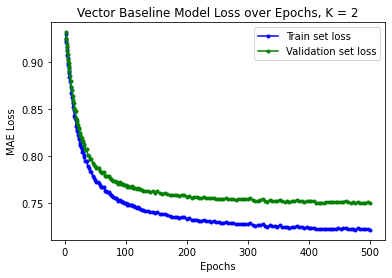

In [16]:
noreg_k2_epochs = ag_np.array(noreg_k2_model.trace_epoch)
noreg_k2_epochs_of_interest = ag_np.argwhere(noreg_k2_epochs >= 2.0)

noreg_k2_train_loss = ag_np.array(noreg_k2_model.trace_mae_train)[noreg_k2_epochs_of_interest]
noreg_k2_valid_loss = ag_np.array(noreg_k2_model.trace_mae_valid)[noreg_k2_epochs_of_interest]

plt.plot(noreg_k2_epochs[noreg_k2_epochs_of_interest], noreg_k2_train_loss, 'b.-', label='Train set loss')
plt.plot(noreg_k2_epochs[noreg_k2_epochs_of_interest], noreg_k2_valid_loss, 'g.-', label='Validation set loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.title('Vector Baseline Model Loss over Epochs, K = 2')

In [22]:
save_predictions(noreg_k2_model, 
                 'noreg_k2_model', 
                 noreg_k2_final_mu, 
                 noreg_k2_final_b_per_user, 
                 noreg_k2_final_c_per_item, 
                 noreg_k2_final_U, 
                 noreg_k2_final_V)
#MAE on Leaderboard = 0.7401

## Using Surprise

In [34]:
from surprise import accuracy, BaselineOnly, Dataset, Reader, SVD
from surprise.model_selection import cross_validate, train_test_split

### Baseline model

In [35]:
# movie data loaded into a pandas dataframe
df = pd.read_csv(os.path.join('data_movie_lens_100k', "ratings_all_development_set.csv"))

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['user_id', 'item_id', 'rating']], reader)

# We can now use this dataset as we please, e.g. calling cross_validate
cross_validate(BaselineOnly(), data, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9459  0.9433  0.9459  0.9475  0.9453  0.9456  0.0013  
MAE (testset)     0.7509  0.7462  0.7484  0.7546  0.7499  0.7500  0.0028  
Fit time          0.33    0.42    0.39    0.36    0.37    0.37    0.03    
Test time         0.20    0.11    0.11    0.18    0.11    0.14    0.04    


{'test_rmse': array([0.94593153, 0.94329908, 0.94586547, 0.94748469, 0.94533002]),
 'test_mae': array([0.75092657, 0.74621599, 0.74836685, 0.75461334, 0.74986745]),
 'fit_time': (0.32837605476379395,
  0.4180569648742676,
  0.3900129795074463,
  0.35918116569519043,
  0.3659648895263672),
 'test_time': (0.19675898551940918,
  0.10978984832763672,
  0.11285400390625,
  0.18480205535888672,
  0.10832476615905762)}

### Using SVD

In [80]:
from surprise.model_selection import KFold

# define a cross-validation iterator
kf = KFold(n_splits=5)

cv_algo = SVD()

for trainset, testset in kf.split(data):

    # train and test algorithm.
    cv_algo.fit(trainset)
    cv_predictions = cv_algo.test(testset)

    # Compute and print Mean Absolute Error
    accuracy.mae(cv_predictions, verbose=True)

MAE:  0.7411
MAE:  0.7388
MAE:  0.7430
MAE:  0.7481
MAE:  0.7429


In [81]:
predictions = cv_algo.test(testset)
accuracy.mae(predictions, verbose=True)

MAE:  0.7429


0.7429267071690356

In [85]:
outdir = 'leaderboard_predictions'
outfile = 'cv_svd_predicted_ratings_leaderboard.txt'
outpath = os.path.join(outdir, outfile)
with open(outpath, 'w') as f:
    for ind in range(len(leaderboard_test_tuple[0])):
        pred = cv_algo.predict(leaderboard_test_tuple[0][ind], leaderboard_test_tuple[0][ind])
        print(pred)
        f.write(str(pred[3])+'\n')

user: 503        item: 503        r_ui = None   est = 4.45   {'was_impossible': False}
user: 795        item: 795        r_ui = None   est = 3.18   {'was_impossible': False}
user: 42         item: 42         r_ui = None   est = 3.42   {'was_impossible': False}
user: 327        item: 327        r_ui = None   est = 3.26   {'was_impossible': False}
user: 285        item: 285        r_ui = None   est = 4.09   {'was_impossible': False}
user: 279        item: 279        r_ui = None   est = 3.41   {'was_impossible': False}
user: 496        item: 496        r_ui = None   est = 3.96   {'was_impossible': False}
user: 499        item: 499        r_ui = None   est = 3.47   {'was_impossible': False}
user: 357        item: 357        r_ui = None   est = 3.49   {'was_impossible': False}
user: 932        item: 932        r_ui = None   est = 1.86   {'was_impossible': False}
user: 821        item: 821        r_ui = None   est = 2.66   {'was_impossible': False}
user: 215        item: 215        r_ui = No

user: 781        item: 781        r_ui = None   est = 2.59   {'was_impossible': False}
user: 681        item: 681        r_ui = None   est = 2.30   {'was_impossible': False}
user: 42         item: 42         r_ui = None   est = 3.42   {'was_impossible': False}
user: 377        item: 377        r_ui = None   est = 2.97   {'was_impossible': False}
user: 693        item: 693        r_ui = None   est = 3.34   {'was_impossible': False}
user: 220        item: 220        r_ui = None   est = 3.96   {'was_impossible': False}
user: 565        item: 565        r_ui = None   est = 2.98   {'was_impossible': False}
user: 531        item: 531        r_ui = None   est = 4.17   {'was_impossible': False}
user: 56         item: 56         r_ui = None   est = 4.23   {'was_impossible': False}
user: 342        item: 342        r_ui = None   est = 3.80   {'was_impossible': False}
user: 362        item: 362        r_ui = None   est = 1.89   {'was_impossible': False}
user: 526        item: 526        r_ui = No

user: 250        item: 250        r_ui = None   est = 4.40   {'was_impossible': False}
user: 42         item: 42         r_ui = None   est = 3.42   {'was_impossible': False}
user: 144        item: 144        r_ui = None   est = 2.93   {'was_impossible': False}
user: 43         item: 43         r_ui = None   est = 3.05   {'was_impossible': False}
user: 372        item: 372        r_ui = None   est = 2.88   {'was_impossible': False}
user: 737        item: 737        r_ui = None   est = 3.20   {'was_impossible': False}
user: 464        item: 464        r_ui = None   est = 3.22   {'was_impossible': False}
user: 74         item: 74         r_ui = None   est = 3.57   {'was_impossible': False}
user: 931        item: 931        r_ui = None   est = 3.38   {'was_impossible': False}
user: 838        item: 838        r_ui = None   est = 2.67   {'was_impossible': False}
user: 372        item: 372        r_ui = None   est = 2.88   {'was_impossible': False}
user: 765        item: 765        r_ui = No

user: 520        item: 520        r_ui = None   est = 3.37   {'was_impossible': False}
user: 404        item: 404        r_ui = None   est = 1.22   {'was_impossible': False}
user: 475        item: 475        r_ui = None   est = 3.08   {'was_impossible': False}
user: 177        item: 177        r_ui = None   est = 4.40   {'was_impossible': False}
user: 534        item: 534        r_ui = None   est = 3.83   {'was_impossible': False}
user: 326        item: 326        r_ui = None   est = 2.44   {'was_impossible': False}
user: 325        item: 325        r_ui = None   est = 3.27   {'was_impossible': False}
user: 140        item: 140        r_ui = None   est = 3.49   {'was_impossible': False}
user: 874        item: 874        r_ui = None   est = 2.82   {'was_impossible': False}
user: 763        item: 763        r_ui = None   est = 3.12   {'was_impossible': False}
user: 654        item: 654        r_ui = None   est = 3.42   {'was_impossible': False}
user: 746        item: 746        r_ui = No

user: 62         item: 62         r_ui = None   est = 2.68   {'was_impossible': False}
user: 641        item: 641        r_ui = None   est = 3.97   {'was_impossible': False}
user: 415        item: 415        r_ui = None   est = 3.22   {'was_impossible': False}
user: 0          item: 0          r_ui = None   est = 3.88   {'was_impossible': False}
user: 157        item: 157        r_ui = None   est = 3.08   {'was_impossible': False}
user: 737        item: 737        r_ui = None   est = 3.20   {'was_impossible': False}
user: 115        item: 115        r_ui = None   est = 3.18   {'was_impossible': False}
user: 328        item: 328        r_ui = None   est = 2.76   {'was_impossible': False}
user: 413        item: 413        r_ui = None   est = 3.46   {'was_impossible': False}
user: 803        item: 803        r_ui = None   est = 3.56   {'was_impossible': False}
user: 327        item: 327        r_ui = None   est = 3.26   {'was_impossible': False}
user: 746        item: 746        r_ui = No

user: 212        item: 212        r_ui = None   est = 4.55   {'was_impossible': False}
user: 853        item: 853        r_ui = None   est = 3.54   {'was_impossible': False}
user: 584        item: 584        r_ui = None   est = 2.61   {'was_impossible': False}
user: 550        item: 550        r_ui = None   est = 3.27   {'was_impossible': False}
user: 144        item: 144        r_ui = None   est = 2.93   {'was_impossible': False}
user: 344        item: 344        r_ui = None   est = 4.01   {'was_impossible': False}
user: 559        item: 559        r_ui = None   est = 3.08   {'was_impossible': False}
user: 298        item: 298        r_ui = None   est = 3.87   {'was_impossible': False}
user: 456        item: 456        r_ui = None   est = 3.51   {'was_impossible': False}
user: 867        item: 867        r_ui = None   est = 2.45   {'was_impossible': False}
user: 449        item: 449        r_ui = None   est = 3.89   {'was_impossible': False}
user: 531        item: 531        r_ui = No

user: 540        item: 540        r_ui = None   est = 2.60   {'was_impossible': False}
user: 312        item: 312        r_ui = None   est = 2.75   {'was_impossible': False}
user: 536        item: 536        r_ui = None   est = 2.99   {'was_impossible': False}
user: 882        item: 882        r_ui = None   est = 3.59   {'was_impossible': False}
user: 37         item: 37         r_ui = None   est = 3.37   {'was_impossible': False}
user: 757        item: 757        r_ui = None   est = 2.81   {'was_impossible': False}
user: 36         item: 36         r_ui = None   est = 3.31   {'was_impossible': False}
user: 120        item: 120        r_ui = None   est = 2.38   {'was_impossible': False}
user: 804        item: 804        r_ui = None   est = 3.99   {'was_impossible': False}
user: 900        item: 900        r_ui = None   est = 4.08   {'was_impossible': False}
user: 394        item: 394        r_ui = None   est = 2.95   {'was_impossible': False}
user: 882        item: 882        r_ui = No

user: 333        item: 333        r_ui = None   est = 2.95   {'was_impossible': False}
user: 199        item: 199        r_ui = None   est = 4.06   {'was_impossible': False}
user: 263        item: 263        r_ui = None   est = 3.14   {'was_impossible': False}
user: 341        item: 341        r_ui = None   est = 2.76   {'was_impossible': False}
user: 600        item: 600        r_ui = None   est = 2.99   {'was_impossible': False}
user: 157        item: 157        r_ui = None   est = 3.08   {'was_impossible': False}
user: 710        item: 710        r_ui = None   est = 3.68   {'was_impossible': False}
user: 556        item: 556        r_ui = None   est = 3.79   {'was_impossible': False}
user: 750        item: 750        r_ui = None   est = 2.97   {'was_impossible': False}
user: 822        item: 822        r_ui = None   est = 3.20   {'was_impossible': False}
user: 847        item: 847        r_ui = None   est = 3.13   {'was_impossible': False}
user: 427        item: 427        r_ui = No

user: 436        item: 436        r_ui = None   est = 2.84   {'was_impossible': False}
user: 938        item: 938        r_ui = None   est = 3.50   {'was_impossible': False}
user: 278        item: 278        r_ui = None   est = 3.17   {'was_impossible': False}
user: 914        item: 914        r_ui = None   est = 2.51   {'was_impossible': False}
user: 311        item: 311        r_ui = None   est = 4.71   {'was_impossible': False}
user: 499        item: 499        r_ui = None   est = 3.47   {'was_impossible': False}
user: 536        item: 536        r_ui = None   est = 2.99   {'was_impossible': False}
user: 12         item: 12         r_ui = None   est = 3.79   {'was_impossible': False}
user: 269        item: 269        r_ui = None   est = 4.30   {'was_impossible': False}
user: 101        item: 101        r_ui = None   est = 2.41   {'was_impossible': False}
user: 471        item: 471        r_ui = None   est = 4.19   {'was_impossible': False}
user: 730        item: 730        r_ui = No

In [86]:
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.mae(predictions)

MAE:  0.7508


0.7507650600189788

In [88]:
outdir = 'leaderboard_predictions'
outfile = 'svd_predicted_ratings_leaderboard.txt'
outpath = os.path.join(outdir, outfile)
with open(outpath, 'w') as f:
    for ind in range(len(leaderboard_test_tuple[0])):
        pred = algo.predict(leaderboard_test_tuple[0][ind], leaderboard_test_tuple[0][ind])
        print(pred)
        f.write(str(pred[3])+'\n')

user: 503        item: 503        r_ui = None   est = 4.00   {'was_impossible': False}
user: 795        item: 795        r_ui = None   est = 3.60   {'was_impossible': False}
user: 42         item: 42         r_ui = None   est = 3.37   {'was_impossible': False}
user: 327        item: 327        r_ui = None   est = 3.23   {'was_impossible': False}
user: 285        item: 285        r_ui = None   est = 3.69   {'was_impossible': False}
user: 279        item: 279        r_ui = None   est = 3.62   {'was_impossible': False}
user: 496        item: 496        r_ui = None   est = 3.73   {'was_impossible': False}
user: 499        item: 499        r_ui = None   est = 3.32   {'was_impossible': False}
user: 357        item: 357        r_ui = None   est = 3.43   {'was_impossible': False}
user: 932        item: 932        r_ui = None   est = 1.87   {'was_impossible': False}
user: 821        item: 821        r_ui = None   est = 2.64   {'was_impossible': False}
user: 215        item: 215        r_ui = No

user: 765        item: 765        r_ui = None   est = 2.76   {'was_impossible': False}
user: 861        item: 861        r_ui = None   est = 4.33   {'was_impossible': False}
user: 714        item: 714        r_ui = None   est = 2.81   {'was_impossible': False}
user: 268        item: 268        r_ui = None   est = 1.99   {'was_impossible': False}
user: 849        item: 849        r_ui = None   est = 3.97   {'was_impossible': False}
user: 20         item: 20         r_ui = None   est = 2.63   {'was_impossible': False}
user: 53         item: 53         r_ui = None   est = 3.89   {'was_impossible': False}
user: 665        item: 665        r_ui = None   est = 3.07   {'was_impossible': False}
user: 859        item: 859        r_ui = None   est = 3.24   {'was_impossible': False}
user: 667        item: 667        r_ui = None   est = 2.37   {'was_impossible': False}
user: 366        item: 366        r_ui = None   est = 2.75   {'was_impossible': False}
user: 345        item: 345        r_ui = No

user: 898        item: 898        r_ui = None   est = 3.67   {'was_impossible': False}
user: 689        item: 689        r_ui = None   est = 3.21   {'was_impossible': False}
user: 740        item: 740        r_ui = None   est = 3.14   {'was_impossible': False}
user: 931        item: 931        r_ui = None   est = 3.19   {'was_impossible': False}
user: 532        item: 532        r_ui = None   est = 3.13   {'was_impossible': False}
user: 865        item: 865        r_ui = None   est = 3.08   {'was_impossible': False}
user: 670        item: 670        r_ui = None   est = 3.06   {'was_impossible': False}
user: 140        item: 140        r_ui = None   est = 3.22   {'was_impossible': False}
user: 372        item: 372        r_ui = None   est = 2.82   {'was_impossible': False}
user: 830        item: 830        r_ui = None   est = 2.40   {'was_impossible': False}
user: 495        item: 495        r_ui = None   est = 2.90   {'was_impossible': False}
user: 415        item: 415        r_ui = No

user: 221        item: 221        r_ui = None   est = 4.14   {'was_impossible': False}
user: 441        item: 441        r_ui = None   est = 3.63   {'was_impossible': False}
user: 17         item: 17         r_ui = None   est = 3.25   {'was_impossible': False}
user: 379        item: 379        r_ui = None   est = 2.94   {'was_impossible': False}
user: 587        item: 587        r_ui = None   est = 4.40   {'was_impossible': False}
user: 446        item: 446        r_ui = None   est = 3.39   {'was_impossible': False}
user: 662        item: 662        r_ui = None   est = 3.61   {'was_impossible': False}
user: 450        item: 450        r_ui = None   est = 2.44   {'was_impossible': False}
user: 655        item: 655        r_ui = None   est = 3.89   {'was_impossible': False}
user: 396        item: 396        r_ui = None   est = 2.47   {'was_impossible': False}
user: 143        item: 143        r_ui = None   est = 3.99   {'was_impossible': False}
user: 853        item: 853        r_ui = No

user: 245        item: 245        r_ui = None   est = 3.81   {'was_impossible': False}
user: 806        item: 806        r_ui = None   est = 3.49   {'was_impossible': False}
user: 895        item: 895        r_ui = None   est = 2.58   {'was_impossible': False}
user: 540        item: 540        r_ui = None   est = 2.04   {'was_impossible': False}
user: 51         item: 51         r_ui = None   est = 4.49   {'was_impossible': False}
user: 652        item: 652        r_ui = None   est = 3.01   {'was_impossible': False}
user: 200        item: 200        r_ui = None   est = 3.16   {'was_impossible': False}
user: 6          item: 6          r_ui = None   est = 4.74   {'was_impossible': False}
user: 268        item: 268        r_ui = None   est = 1.99   {'was_impossible': False}
user: 415        item: 415        r_ui = None   est = 3.50   {'was_impossible': False}
user: 501        item: 501        r_ui = None   est = 3.51   {'was_impossible': False}
user: 200        item: 200        r_ui = No

user: 200        item: 200        r_ui = None   est = 3.16   {'was_impossible': False}
user: 935        item: 935        r_ui = None   est = 3.79   {'was_impossible': False}
user: 292        item: 292        r_ui = None   est = 2.11   {'was_impossible': False}
user: 521        item: 521        r_ui = None   est = 4.64   {'was_impossible': False}
user: 105        item: 105        r_ui = None   est = 3.11   {'was_impossible': False}
user: 504        item: 504        r_ui = None   est = 3.49   {'was_impossible': False}
user: 689        item: 689        r_ui = None   est = 3.21   {'was_impossible': False}
user: 270        item: 270        r_ui = None   est = 3.71   {'was_impossible': False}
user: 353        item: 353        r_ui = None   est = 3.14   {'was_impossible': False}
user: 720        item: 720        r_ui = None   est = 3.30   {'was_impossible': False}
user: 411        item: 411        r_ui = None   est = 2.74   {'was_impossible': False}
user: 27         item: 27         r_ui = No

user: 90         item: 90         r_ui = None   est = 3.76   {'was_impossible': False}
user: 468        item: 468        r_ui = None   est = 4.08   {'was_impossible': False}
user: 270        item: 270        r_ui = None   est = 3.71   {'was_impossible': False}
user: 507        item: 507        r_ui = None   est = 4.02   {'was_impossible': False}
user: 215        item: 215        r_ui = None   est = 4.24   {'was_impossible': False}
user: 616        item: 616        r_ui = None   est = 2.09   {'was_impossible': False}
user: 907        item: 907        r_ui = None   est = 3.33   {'was_impossible': False}
user: 829        item: 829        r_ui = None   est = 2.48   {'was_impossible': False}
user: 504        item: 504        r_ui = None   est = 3.49   {'was_impossible': False}
user: 676        item: 676        r_ui = None   est = 3.83   {'was_impossible': False}
user: 653        item: 653        r_ui = None   est = 4.03   {'was_impossible': False}
user: 125        item: 125        r_ui = No

user: 279        item: 279        r_ui = None   est = 3.62   {'was_impossible': False}
user: 761        item: 761        r_ui = None   est = 2.85   {'was_impossible': False}
user: 200        item: 200        r_ui = None   est = 3.16   {'was_impossible': False}
user: 869        item: 869        r_ui = None   est = 2.70   {'was_impossible': False}
user: 343        item: 343        r_ui = None   est = 3.35   {'was_impossible': False}
user: 827        item: 827        r_ui = None   est = 2.59   {'was_impossible': False}
user: 876        item: 876        r_ui = None   est = 2.66   {'was_impossible': False}
user: 483        item: 483        r_ui = None   est = 4.55   {'was_impossible': False}
user: 416        item: 416        r_ui = None   est = 3.53   {'was_impossible': False}
user: 473        item: 473        r_ui = None   est = 4.46   {'was_impossible': False}
user: 532        item: 532        r_ui = None   est = 3.13   {'was_impossible': False}
user: 732        item: 732        r_ui = No

### Using KNN

In [89]:
from surprise import KNNBasic
knn_algo = KNNBasic()

# Train the algorithm on the trainset, and predict ratings for the testset
knn_algo.fit(trainset)
knn_predictions = knn_algo.test(testset)

# Then compute MAE
accuracy.mae(knn_predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7815


0.7814978476820299

In [90]:
from surprise import KNNWithMeans
knn_means_algo = KNNWithMeans()

# Train the algorithm on the trainset, and predict ratings for the testset
knn_means_algo.fit(trainset)
knn_means_predictions = knn_means_algo.test(testset)

# Then compute MAE
accuracy.mae(knn_means_predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7537


0.7537069900117388

In [91]:
outdir = 'leaderboard_predictions'
outfile = 'knn_means_predicted_ratings_leaderboard.txt'
outpath = os.path.join(outdir, outfile)
with open(outpath, 'w') as f:
    for ind in range(len(leaderboard_test_tuple[0])):
        pred = knn_means_algo.predict(leaderboard_test_tuple[0][ind], leaderboard_test_tuple[0][ind])
        print(pred)
        f.write(str(pred[3])+'\n')

user: 503        item: 503        r_ui = None   est = 3.89   {'actual_k': 40, 'was_impossible': False}
user: 795        item: 795        r_ui = None   est = 3.31   {'actual_k': 23, 'was_impossible': False}
user: 42         item: 42         r_ui = None   est = 3.27   {'actual_k': 29, 'was_impossible': False}
user: 327        item: 327        r_ui = None   est = 3.25   {'actual_k': 26, 'was_impossible': False}
user: 285        item: 285        r_ui = None   est = 3.69   {'actual_k': 40, 'was_impossible': False}
user: 279        item: 279        r_ui = None   est = 3.24   {'actual_k': 40, 'was_impossible': False}
user: 496        item: 496        r_ui = None   est = 3.61   {'actual_k': 40, 'was_impossible': False}
user: 499        item: 499        r_ui = None   est = 3.20   {'actual_k': 40, 'was_impossible': False}
user: 357        item: 357        r_ui = None   est = 3.53   {'actual_k': 7, 'was_impossible': False}
user: 932        item: 932        r_ui = None   est = 2.09   {'actual_k': 

user: 129        item: 129        r_ui = None   est = 2.96   {'actual_k': 16, 'was_impossible': False}
user: 665        item: 665        r_ui = None   est = 2.74   {'actual_k': 9, 'was_impossible': False}
user: 706        item: 706        r_ui = None   est = 3.38   {'actual_k': 40, 'was_impossible': False}
user: 220        item: 220        r_ui = None   est = 3.67   {'actual_k': 40, 'was_impossible': False}
user: 500        item: 500        r_ui = None   est = 3.75   {'actual_k': 31, 'was_impossible': False}
user: 496        item: 496        r_ui = None   est = 3.61   {'actual_k': 40, 'was_impossible': False}
user: 547        item: 547        r_ui = None   est = 3.93   {'actual_k': 40, 'was_impossible': False}
user: 242        item: 242        r_ui = None   est = 2.44   {'actual_k': 40, 'was_impossible': False}
user: 300        item: 300        r_ui = None   est = 4.16   {'actual_k': 40, 'was_impossible': False}
user: 523        item: 523        r_ui = None   est = 3.92   {'actual_k': 

user: 499        item: 499        r_ui = None   est = 3.20   {'actual_k': 40, 'was_impossible': False}
user: 2          item: 2          r_ui = None   est = 2.64   {'actual_k': 40, 'was_impossible': False}
user: 22         item: 22         r_ui = None   est = 4.08   {'actual_k': 40, 'was_impossible': False}
user: 129        item: 129        r_ui = None   est = 2.96   {'actual_k': 16, 'was_impossible': False}
user: 642        item: 642        r_ui = None   est = 3.90   {'actual_k': 23, 'was_impossible': False}
user: 93         item: 93         r_ui = None   est = 3.12   {'actual_k': 40, 'was_impossible': False}
user: 765        item: 765        r_ui = None   est = 2.36   {'actual_k': 9, 'was_impossible': False}
user: 861        item: 861        r_ui = None   est = 4.34   {'actual_k': 17, 'was_impossible': False}
user: 714        item: 714        r_ui = None   est = 2.96   {'actual_k': 34, 'was_impossible': False}
user: 268        item: 268        r_ui = None   est = 2.80   {'actual_k': 

user: 497        item: 497        r_ui = None   est = 3.44   {'actual_k': 40, 'was_impossible': False}
user: 498        item: 498        r_ui = None   est = 4.11   {'actual_k': 22, 'was_impossible': False}
user: 12         item: 12         r_ui = None   est = 2.84   {'actual_k': 40, 'was_impossible': False}
user: 422        item: 422        r_ui = None   est = 1.64   {'actual_k': 13, 'was_impossible': False}
user: 101        item: 101        r_ui = None   est = 2.21   {'actual_k': 40, 'was_impossible': False}
user: 243        item: 243        r_ui = None   est = 3.15   {'actual_k': 30, 'was_impossible': False}
user: 404        item: 404        r_ui = None   est = 1.00   {'actual_k': 39, 'was_impossible': False}
user: 157        item: 157        r_ui = None   est = 2.87   {'actual_k': 38, 'was_impossible': False}
user: 889        item: 889        r_ui = None   est = 3.90   {'actual_k': 3, 'was_impossible': False}
user: 867        item: 867        r_ui = None   est = 2.49   {'actual_k': 

user: 198        item: 198        r_ui = None   est = 3.50   {'actual_k': 40, 'was_impossible': False}
user: 147        item: 147        r_ui = None   est = 3.74   {'actual_k': 40, 'was_impossible': False}
user: 681        item: 681        r_ui = None   est = 2.25   {'actual_k': 35, 'was_impossible': False}
user: 270        item: 270        r_ui = None   est = 3.97   {'actual_k': 40, 'was_impossible': False}
user: 267        item: 267        r_ui = None   est = 3.50   {'actual_k': 40, 'was_impossible': False}
user: 494        item: 494        r_ui = None   est = 4.40   {'actual_k': 40, 'was_impossible': False}
user: 492        item: 492        r_ui = None   est = 3.87   {'actual_k': 39, 'was_impossible': False}
user: 124        item: 124        r_ui = None   est = 3.40   {'actual_k': 40, 'was_impossible': False}
user: 806        item: 806        r_ui = None   est = 3.62   {'actual_k': 23, 'was_impossible': False}
user: 61         item: 61         r_ui = None   est = 2.80   {'actual_k':

user: 10         item: 10         r_ui = None   est = 3.13   {'actual_k': 40, 'was_impossible': False}
user: 541        item: 541        r_ui = None   est = 3.55   {'actual_k': 14, 'was_impossible': False}
user: 398        item: 398        r_ui = None   est = 2.31   {'actual_k': 10, 'was_impossible': False}
user: 932        item: 932        r_ui = None   est = 2.09   {'actual_k': 40, 'was_impossible': False}
user: 613        item: 613        r_ui = None   est = 3.28   {'actual_k': 32, 'was_impossible': False}
user: 879        item: 879        r_ui = None   est = 3.02   {'actual_k': 34, 'was_impossible': False}
user: 536        item: 536        r_ui = None   est = 2.86   {'actual_k': 40, 'was_impossible': False}
user: 566        item: 566        r_ui = None   est = 3.91   {'actual_k': 40, 'was_impossible': False}
user: 193        item: 193        r_ui = None   est = 3.47   {'actual_k': 40, 'was_impossible': False}
user: 503        item: 503        r_ui = None   est = 3.89   {'actual_k':

user: 885        item: 885        r_ui = None   est = 3.72   {'actual_k': 28, 'was_impossible': False}
user: 740        item: 740        r_ui = None   est = 3.55   {'actual_k': 40, 'was_impossible': False}
user: 879        item: 879        r_ui = None   est = 3.02   {'actual_k': 34, 'was_impossible': False}
user: 338        item: 338        r_ui = None   est = 4.37   {'actual_k': 40, 'was_impossible': False}
user: 565        item: 565        r_ui = None   est = 2.82   {'actual_k': 24, 'was_impossible': False}
user: 556        item: 556        r_ui = None   est = 3.94   {'actual_k': 40, 'was_impossible': False}
user: 715        item: 715        r_ui = None   est = 3.16   {'actual_k': 40, 'was_impossible': False}
user: 83         item: 83         r_ui = None   est = 3.13   {'actual_k': 12, 'was_impossible': False}
user: 387        item: 387        r_ui = None   est = 4.35   {'actual_k': 19, 'was_impossible': False}
user: 658        item: 658        r_ui = None   est = 3.66   {'actual_k':

user: 11         item: 11         r_ui = None   est = 5.00   {'actual_k': 40, 'was_impossible': False}
user: 212        item: 212        r_ui = None   est = 4.47   {'actual_k': 40, 'was_impossible': False}
user: 437        item: 437        r_ui = None   est = 2.30   {'actual_k': 3, 'was_impossible': False}
user: 544        item: 544        r_ui = None   est = 3.08   {'actual_k': 40, 'was_impossible': False}
user: 278        item: 278        r_ui = None   est = 2.79   {'actual_k': 40, 'was_impossible': False}
user: 902        item: 902        r_ui = None   est = 3.87   {'actual_k': 12, 'was_impossible': False}
user: 500        item: 500        r_ui = None   est = 3.75   {'actual_k': 31, 'was_impossible': False}
user: 893        item: 893        r_ui = None   est = 3.04   {'actual_k': 40, 'was_impossible': False}
user: 475        item: 475        r_ui = None   est = 3.23   {'actual_k': 40, 'was_impossible': False}
user: 397        item: 397        r_ui = None   est = 3.46   {'actual_k': 

user: 513        item: 513        r_ui = None   est = 4.42   {'actual_k': 40, 'was_impossible': False}
user: 746        item: 746        r_ui = None   est = 3.15   {'actual_k': 40, 'was_impossible': False}
user: 270        item: 270        r_ui = None   est = 3.97   {'actual_k': 40, 'was_impossible': False}
user: 360        item: 360        r_ui = None   est = 3.11   {'actual_k': 22, 'was_impossible': False}
user: 714        item: 714        r_ui = None   est = 2.96   {'actual_k': 34, 'was_impossible': False}
user: 287        item: 287        r_ui = None   est = 3.19   {'actual_k': 40, 'was_impossible': False}
user: 536        item: 536        r_ui = None   est = 2.86   {'actual_k': 40, 'was_impossible': False}
user: 293        item: 293        r_ui = None   est = 3.56   {'actual_k': 40, 'was_impossible': False}
user: 706        item: 706        r_ui = None   est = 3.38   {'actual_k': 40, 'was_impossible': False}
user: 304        item: 304        r_ui = None   est = 3.78   {'actual_k':

user: 867        item: 867        r_ui = None   est = 2.49   {'actual_k': 14, 'was_impossible': False}
user: 285        item: 285        r_ui = None   est = 3.69   {'actual_k': 40, 'was_impossible': False}
user: 729        item: 729        r_ui = None   est = 2.96   {'actual_k': 24, 'was_impossible': False}
user: 755        item: 755        r_ui = None   est = 3.18   {'actual_k': 2, 'was_impossible': False}
user: 392        item: 392        r_ui = None   est = 3.19   {'actual_k': 8, 'was_impossible': False}
user: 706        item: 706        r_ui = None   est = 3.38   {'actual_k': 40, 'was_impossible': False}
user: 542        item: 542        r_ui = None   est = 3.42   {'actual_k': 40, 'was_impossible': False}
user: 404        item: 404        r_ui = None   est = 1.00   {'actual_k': 39, 'was_impossible': False}
user: 335        item: 335        r_ui = None   est = 2.38   {'actual_k': 9, 'was_impossible': False}
user: 125        item: 125        r_ui = None   est = 3.64   {'actual_k': 40

user: 388        item: 388        r_ui = None   est = 4.16   {'actual_k': 6, 'was_impossible': False}
user: 884        item: 884        r_ui = None   est = 3.22   {'actual_k': 33, 'was_impossible': False}
user: 698        item: 698        r_ui = None   est = 2.56   {'actual_k': 11, 'was_impossible': False}
user: 4          item: 4          r_ui = None   est = 2.67   {'actual_k': 40, 'was_impossible': False}
user: 252        item: 252        r_ui = None   est = 4.23   {'actual_k': 23, 'was_impossible': False}
user: 647        item: 647        r_ui = None   est = 3.14   {'actual_k': 29, 'was_impossible': False}
user: 392        item: 392        r_ui = None   est = 3.19   {'actual_k': 8, 'was_impossible': False}
user: 346        item: 346        r_ui = None   est = 3.46   {'actual_k': 20, 'was_impossible': False}
user: 175        item: 175        r_ui = None   est = 4.12   {'actual_k': 40, 'was_impossible': False}
user: 663        item: 663        r_ui = None   est = 3.11   {'actual_k': 4

user: 206        item: 206        r_ui = None   est = 3.41   {'actual_k': 40, 'was_impossible': False}
user: 84         item: 84         r_ui = None   est = 3.13   {'actual_k': 40, 'was_impossible': False}
user: 275        item: 275        r_ui = None   est = 3.32   {'actual_k': 40, 'was_impossible': False}
user: 561        item: 561        r_ui = None   est = 2.42   {'actual_k': 17, 'was_impossible': False}
user: 177        item: 177        r_ui = None   est = 4.14   {'actual_k': 40, 'was_impossible': False}
user: 256        item: 256        r_ui = None   est = 4.03   {'actual_k': 40, 'was_impossible': False}
user: 150        item: 150        r_ui = None   est = 4.43   {'actual_k': 40, 'was_impossible': False}
user: 372        item: 372        r_ui = None   est = 2.54   {'actual_k': 8, 'was_impossible': False}
user: 143        item: 143        r_ui = None   est = 4.13   {'actual_k': 40, 'was_impossible': False}
user: 652        item: 652        r_ui = None   est = 3.03   {'actual_k': 

user: 282        item: 282        r_ui = None   est = 4.02   {'actual_k': 40, 'was_impossible': False}
user: 937        item: 937        r_ui = None   est = 3.52   {'actual_k': 39, 'was_impossible': False}
user: 355        item: 355        r_ui = None   est = 4.09   {'actual_k': 40, 'was_impossible': False}
user: 731        item: 731        r_ui = None   est = 3.53   {'actual_k': 10, 'was_impossible': False}
user: 814        item: 814        r_ui = None   est = 2.68   {'actual_k': 15, 'was_impossible': False}
user: 845        item: 845        r_ui = None   est = 3.79   {'actual_k': 29, 'was_impossible': False}
user: 647        item: 647        r_ui = None   est = 3.14   {'actual_k': 29, 'was_impossible': False}
user: 751        item: 751        r_ui = None   est = 3.45   {'actual_k': 16, 'was_impossible': False}
user: 362        item: 362        r_ui = None   est = 2.33   {'actual_k': 24, 'was_impossible': False}
user: 566        item: 566        r_ui = None   est = 3.91   {'actual_k':

user: 180        item: 180        r_ui = None   est = 1.93   {'actual_k': 40, 'was_impossible': False}
user: 415        item: 415        r_ui = None   est = 3.46   {'actual_k': 40, 'was_impossible': False}
user: 523        item: 523        r_ui = None   est = 3.92   {'actual_k': 40, 'was_impossible': False}
user: 278        item: 278        r_ui = None   est = 2.79   {'actual_k': 40, 'was_impossible': False}
user: 485        item: 485        r_ui = None   est = 3.64   {'actual_k': 40, 'was_impossible': False}
user: 118        item: 118        r_ui = None   est = 4.86   {'actual_k': 3, 'was_impossible': False}
user: 379        item: 379        r_ui = None   est = 3.05   {'actual_k': 40, 'was_impossible': False}
user: 111        item: 111        r_ui = None   est = 2.89   {'actual_k': 14, 'was_impossible': False}
user: 273        item: 273        r_ui = None   est = 4.41   {'actual_k': 40, 'was_impossible': False}
user: 377        item: 377        r_ui = None   est = 3.08   {'actual_k': 